In [16]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [9]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [10]:
df.describe(include=['object'])

,sex,cp,restecg,exang,slope,thal
count,908,908,908,908,908,908
unique,2,4,3,3,3,3
top,Male,asymptomatic,normal,FALSE,flat,normal
freq,718,495,542,535,453,355


In [11]:
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,normal,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,fixed defect,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4


In [14]:
df.duplicated().sum()

1

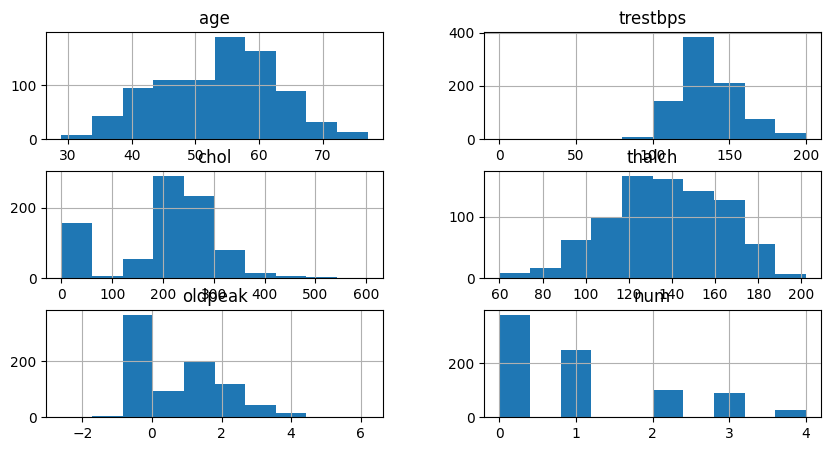

In [15]:
df.hist(figsize=(10,5))
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
# Handle missing values
for i in df.select_dtypes(include=['int64', 'float64']).columns:
    df[i].fillna(df[i].mean(), inplace=True)
for i in df.select_dtypes(include=['object']).columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()

for col in categorical_columns:
    unique_values = df[col].nunique()
    if unique_values < 5:
        # Apply OneHotEncoding
        encoded = one_hot_encoder.fit_transform(df[[col]])
        encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{category}" for category in one_hot_encoder.categories_[0]], index=df.index)
        df = pd.concat([df, encoded_df], axis=1).drop(col, axis=1)
    else:
        # Apply LabelEncoding
        df[col] = label_encoder.fit_transform(df[col])

In [26]:

# Display the first few rows of the dataframe after encoding
print("\nDataframe after encoding categorical variables:")
print(df.head())

# Scale numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Standard scaling
standard_scaler = StandardScaler()
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Displaying the first few rows of the scaled dataframe
print("\nData after Standard Scaling:")
print(df.head())



Dataframe after encoding categorical variables:
   age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3       145   233   True        0     150      0      2.3   
1   41    1   1       135   203  False        1     132      0      0.0   
2   57    1   0       140   192  False        1     148      0      0.4   
3   52    1   3       118   186  False        0     190      0      0.0   
4   57    1   0       110   201  False        1     126      1      1.5   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0  

Data after Standard Scaling:
        age       sex        cp  trestbps      chol    fbs   restecg  \
0  1.006027  0.514416  2.320276  0.567394  0.281297   True -1.561352   
1 -1.397560  0.514416  0.232258  0.076967  0.013526  False  0.013879   
2  0.350503  0.514416 -0.811752  0.322181 -0.084656  False  0.013879   
3 -0.195767  0.514416  2.320276 -0.756760 -0.13821

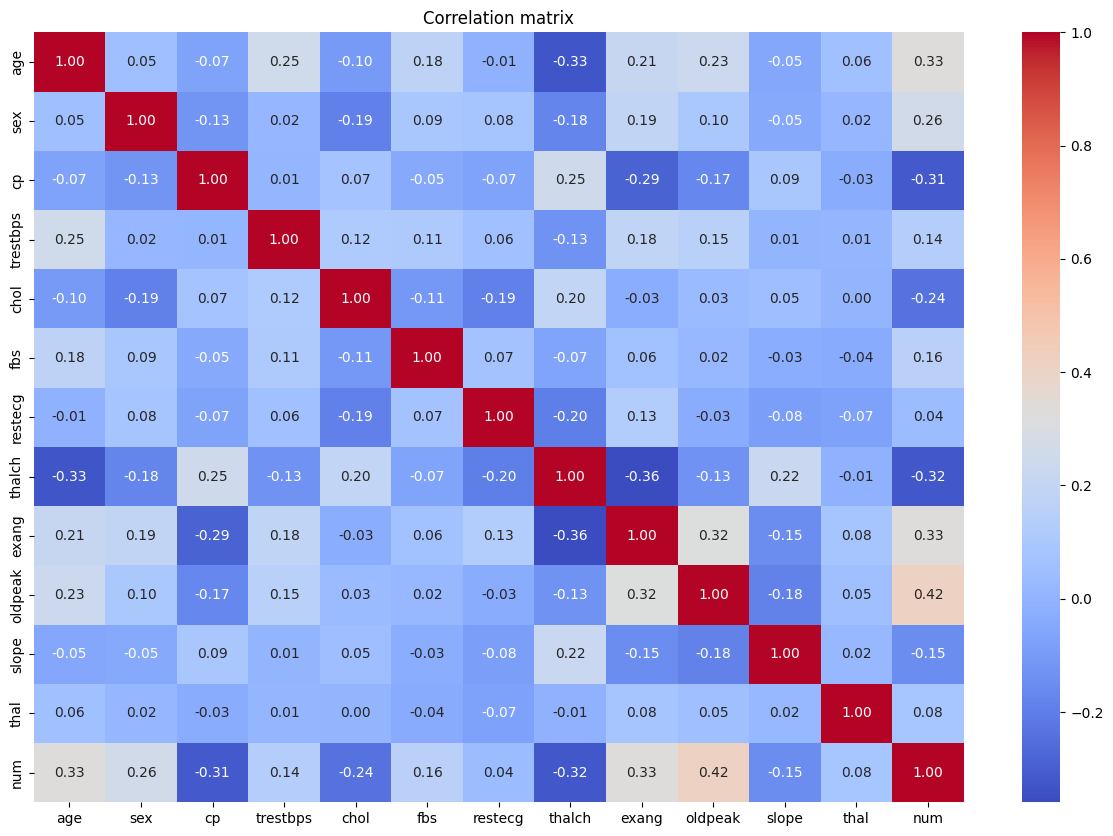

In [29]:
for i in categorical_columns:
    df[i] = label_encoder.fit_transform(df[i])
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


In [39]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns)

# Split the dataset into features (X) and target (y)
X = df.drop('restecg', axis=1)
y = df['restecg']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

# Implement a Decision Tree Classification model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)


# Evaluate the model using appropriate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.54
Precision: 0.46
Recall: 0.46
F1-Score: 0.45
ROC AUC Score: 0.58


In [42]:
from sklearn.model_selection import GridSearchCV
# Convert continuous target variable into categorical classes using binning
bins = np.linspace(min(y), max(y), 4)  # Define bin edges
y_binned = np.digitize(y, bins) - 1  # Convert continuous values into categorical labels

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y_binned)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
